# Perzeptronfunktionen definieren

In [98]:
import numpy as np
from random import randint

# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x
    
f = np.vectorize(f)

def create_new_perceptron(nr_inputs, nr_outputs):
    low = -1
    high = +1
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W


def test_perceptron(W, x_test, y_test):
    
    nr_test_samples = x_test.shape[0]    
    correct = 0
    for test_sample_nr in range(0,nr_test_samples):
        
        # Berechnet den Output
        row_vec = x_test[test_sample_nr, :]
        x = np.append(row_vec,[1])
        out = predict(W,x)
        
        # Was wäre richtig gewesen?        
        one_hot_vec = y_test[test_sample_nr, :]
        gt_label = np.argmax( one_hot_vec )

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)
        if is_label == gt_label:
            correct += 1     
            
    print("Korrekt: {} von {}".format(correct,nr_test_samples))
    
    return correct/nr_test_samples
    

def train_perceptron(W,
                     x_train, y_train,
                     x_test, y_test,
                     nr_train_steps,
                     alpha):
    
    nr_outputs = y_train.shape[1]
    
    history = []
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Suche zufällige Zeile aus den
        # Trainingsdaten raus
        row_vec = x_train[rnd_img_nr, :]        
        x = np.append(row_vec,[1])        
        out = predict(W,x)
        
        # Was hätte rauskommen sollen?
        one_hot_vec = y_train[rnd_img_nr, :]
                                
        # Fehlerberechnung        
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            correct_ratio = test_perceptron(W, x_test, y_test)
            history.append( correct_ratio )
            
    return history


def predict(W,x):
    act = np.matmul(x, W)
    out = f(act)
    return out
    

# Beispieldaten erzeugen

In [99]:
min_coord = -1.0
max_coord = +1.0
nr_train_samples = 1000
data_x = np.random.uniform(min_coord,max_coord, (nr_train_samples, 2))

In [100]:
data_x.shape

(1000, 2)

In [101]:
data_x[:10]

array([[ 0.0516565 ,  0.78703554],
       [ 0.35910097,  0.3064884 ],
       [ 0.13864001,  0.72813462],
       [ 0.95752532,  0.69394892],
       [-0.87809823,  0.31798195],
       [ 0.58643025, -0.2129803 ],
       [ 0.0690399 ,  0.72441755],
       [-0.33738107,  0.04784141],
       [-0.77807652,  0.80828144],
       [ 0.95295203,  0.92346011]])

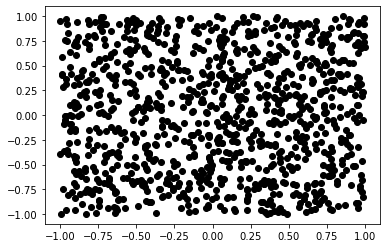

In [102]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], color="black")
plt.show()

In [103]:
# Left/Right
def gt_class1(point):
    if point[0]<0.0:
        return [1,0]
    else:
        return [0,1]

In [104]:
# Circle
import math

def gt_class2(point):
    x = point[0]
    y = point[1]
    dist = math.sqrt(x**2+y**2)
    if dist<0.5:
        return [1,0]
    else:
        return [0,1]

In [105]:
# Diagonal
import math

def gt_class3(point):
    x = point[0]
    y = point[1]
    if x*1.0+y*1.0<0.5:
        return [1,0]
    else:
        return [0,1]

Wählen Sie hier zwischen:

- gt_class1
- gt_class2
- gt_class3

um zu testen, wie gut das Perzeptron unterschiedliche Klassifikationsprobleme lösen kann.

In [106]:
gt_class = gt_class2

In [107]:
gt_class((-0.5,1.0))

[0, 1]

In [108]:
gt_class((-0.5,-1.0))

[0, 1]

In [109]:
gt_class((+0.1,-1.0))

[0, 1]

In [110]:
gt_class((+0.1,-.1))

[1, 0]

In [111]:
for p in data_x[:10]:
    print(p, gt_class(p))

[0.0516565  0.78703554] [0, 1]
[0.35910097 0.3064884 ] [1, 0]
[0.13864001 0.72813462] [0, 1]
[0.95752532 0.69394892] [0, 1]
[-0.87809823  0.31798195] [0, 1]
[ 0.58643025 -0.2129803 ] [0, 1]
[0.0690399  0.72441755] [0, 1]
[-0.33738107  0.04784141] [1, 0]
[-0.77807652  0.80828144] [0, 1]
[0.95295203 0.92346011] [0, 1]


In [112]:
data_y = [gt_class(p) for p in data_x]

In [113]:
data_y[:10]

[[0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1]]

In [114]:
data_y = np.array( [gt_class(p) for p in data_x ] )

In [115]:
type(data_y)

numpy.ndarray

In [116]:
data_y.shape

(1000, 2)

In [117]:
colors = [np.argmax(row) for row in data_y]

In [118]:
colors[:10]

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

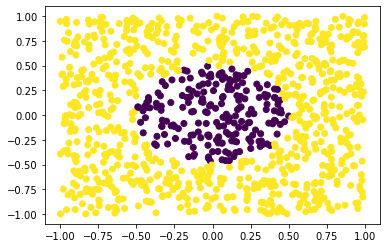

In [119]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], c=colors)
plt.show()

In [120]:
def generate_example_data(how_much):
    min_coord = -1.0
    max_coord = +1.0
    data_x = np.random.uniform(min_coord,max_coord, (how_much, 2))
    data_y = np.array( [gt_class(p) for p in data_x ] )
    return data_x, data_y

# Trainings- und Testdaten erzeugen

In [121]:
data_x, data_y = generate_example_data(1000)

In [122]:
data_x.shape

(1000, 2)

In [123]:
data_y.shape

(1000, 2)

In [124]:
N = int(data_x.shape[0] * 0.8)

In [125]:
N

800

In [126]:
x_train = data_x[:N]
y_train = data_y[:N]
x_test  = data_x[N:]
y_test  = data_y[N:]

In [127]:
x_train.shape

(800, 2)

In [128]:
y_train.shape

(800, 2)

In [129]:
x_test.shape

(200, 2)

In [130]:
y_test.shape

(200, 2)

# Netz aufbauen und trainieren

In [131]:
n_inputs = 2+1
n_outputs = 2
W = create_new_perceptron(n_inputs,n_outputs)

In [132]:
W.shape

(3, 2)

In [133]:
W

array([[-0.26379509, -0.39316447],
       [-0.47830953,  0.39336071],
       [-0.40146256, -0.87678493]])

In [134]:
test_perceptron(W, x_test, y_test)

Korrekt: 43 von 200


0.215

In [135]:
alpha = 0.01
nr_train_steps = 1000
history = train_perceptron(W,
                           x_train, y_train,
                           x_test, y_test,
                           nr_train_steps,
                           alpha)


Train step:  0
Korrekt: 43 von 200

Train step:  100
Korrekt: 45 von 200

Train step:  200
Korrekt: 107 von 200

Train step:  300
Korrekt: 146 von 200

Train step:  400
Korrekt: 151 von 200

Train step:  500
Korrekt: 151 von 200

Train step:  600
Korrekt: 156 von 200

Train step:  700
Korrekt: 157 von 200

Train step:  800
Korrekt: 157 von 200

Train step:  900
Korrekt: 157 von 200


# Netz testen

In [136]:
x_test.shape

(200, 2)

In [137]:
x_test[:5]

array([[-0.61488235,  0.08539668],
       [-0.11688599, -0.84889908],
       [-0.05325411,  0.1136113 ],
       [ 0.58136918,  0.11374048],
       [ 0.99867506,  0.19467087]])

In [138]:
y_test.shape

(200, 2)

In [139]:
y_test[:5]

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

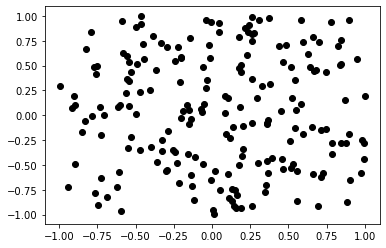

In [140]:
plt.scatter(x_test[:,0], x_test[:,1], color="black")
plt.show()

In [141]:
all_outputs = []
for row_vec in x_test:
    x = np.append(row_vec,[1])
    out = predict(W,x)
    all_outputs.append( out )

In [142]:
all_outputs[:10]

[array([0.23371915, 0.77906653]),
 array([0.26407465, 0.74043536]),
 array([0.20933183, 0.79323023]),
 array([0.18349537, 0.80754044]),
 array([0.16212567, 0.82126434]),
 array([0.28722501, 0.72905408]),
 array([0.2546697 , 0.74530024]),
 array([0.21785381, 0.77139649]),
 array([0.21951784, 0.79049086]),
 array([0.21681981, 0.79808871])]

In [143]:
colors = [np.argmax(outarray) for outarray in all_outputs]

In [144]:
colors[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

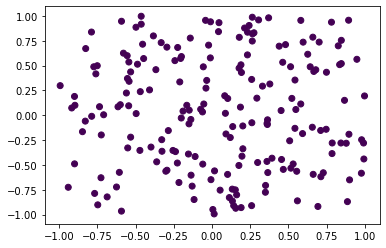

In [145]:
plt.scatter(x_test[:,0], x_test[:,1], c=colors)
plt.show()